# Introduction

This is a notebook where I explore the data and make some maps. The goal of this assignment is to do a causal analysis with this dataset. I was not sure what kind of plots to make until I noticed the columns for lattitude and longitude.

In [1]:
import os
import plotly.express as px
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [2]:
train = pd.read_csv('train.csv')
spray = pd.read_csv('spray.csv')
weather = pd.read_csv('weather.csv')

In [3]:
train.columns

Index(['Date', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy',
       'NumMosquitos', 'WnvPresent'],
      dtype='object')

In [4]:
train.describe()

,Block,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
count,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000
mean,35.687797,41.841139,-87.699908,7.819532,12.853512,0.052446
std,24.339468,0.112742,0.096514,1.452921,16.133816,0.222936
min,10.000000,41.644612,-87.930995,3.000000,1.000000,0.000000
25%,12.000000,41.732984,-87.760070,8.000000,2.000000,0.000000
50%,33.000000,41.846283,-87.694991,8.000000,5.000000,0.000000
75%,52.000000,41.954690,-87.627796,9.000000,17.000000,0.000000
max,98.000000,42.017430,-87.531635,9.000000,50.000000,1.000000


In [5]:
train.WnvPresent.value_counts()

WnvPresent
0    9955
1     551
Name: count, dtype: int64

This is an Imbalanced Dataset, Most cases have West Nile Virus absent.
We will explore areas of the city where West Nile Virus is present

# Plotting the satellite traps on the map

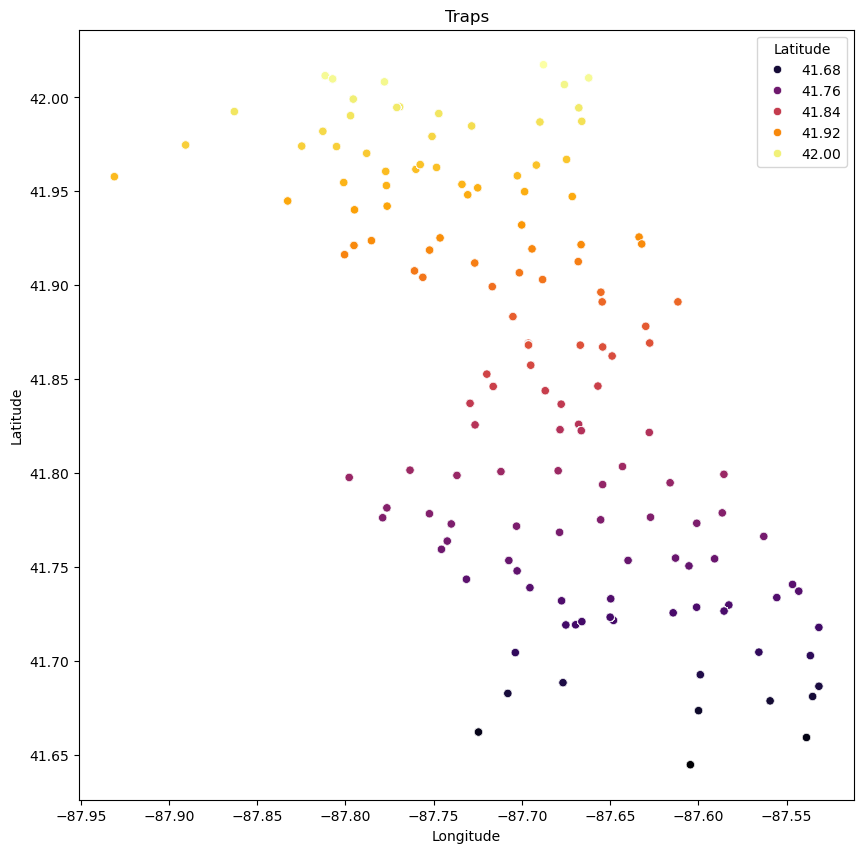

In [6]:
plt.figure(figsize=(10,10))
sb.scatterplot(data=train, x='Longitude', y='Latitude', palette='inferno',hue='Latitude')

# Set title
plt.title('Traps')

# Show the plot
plt.show()


# Areas where mosquito repellant was sprayed

In [7]:
spray.columns

Index(['Date', 'Time', 'Latitude', 'Longitude'], dtype='object')

In [8]:
spray.describe()

,Latitude,Longitude
count,14835.000000,14835.000000
mean,41.904828,-87.736690
std,0.104381,0.067292
min,41.713925,-88.096468
25%,41.785001,-87.794225
50%,41.940075,-87.727853
75%,41.980978,-87.694108
max,42.395983,-87.586727


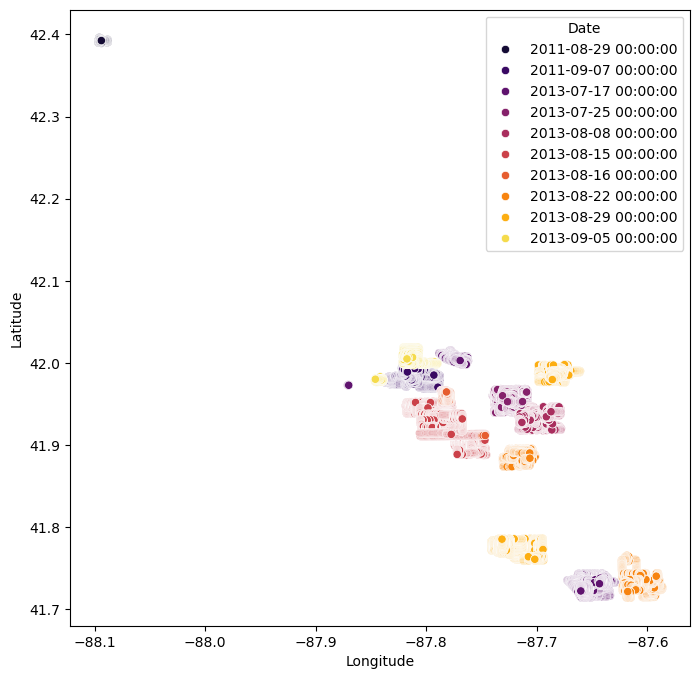

In [9]:
spray['Date'] = pd.to_datetime(spray['Date'])
plt.figure(figsize=(8,8))
sb.scatterplot(data=spray, x='Longitude', y='Latitude', hue='Date',palette='inferno')
plt.show()

Each data point is color-coded according to the date it represents, ranging from “2011-08-29” to “2013-09-05”. The data points are primarily scattered between latitudes 41.9 and 42.0, and longitudes -87.9 and -87.7. There’s an data point at around latitude 42.4 and longitude -88, marked in dark purple indicating it’s dated “2011-08-29”. This plot provides a clear visualization of the geographical distribution of data over time.

In [10]:
mosquito_count = train.groupby(['Address'], as_index = False)[['NumMosquitos']].sum()
mosquito_count

,Address,NumMosquitos
0,"1000 East 67th Street, Chicago, IL 60637, USA",852
1,"1000 North Central Park Avenue, Chicago, IL 60...",1802
2,"1000 South California Avenue, Chicago, IL 6061...",125
3,"1000 West 95th Street, Chicago, IL 60643, USA",185
4,"1100 North Artesian Avenue, Chicago, IL 60622,...",666
...,...,...
133,"South Vincennes Avenue, Chicago, IL, USA",374
134,"South Wallace Street, Chicago, IL, USA",28
135,"University of Illinois at Chicago, 1100 South ...",1685
136,"West 37th Place, Chicago, IL, USA",47


In [11]:
areas = train.groupby(['Address'], as_index = False)[['Latitude','Longitude']].median()
areas

,Address,Latitude,Longitude
0,"1000 East 67th Street, Chicago, IL 60637, USA",41.773215,-87.600880
1,"1000 North Central Park Avenue, Chicago, IL 60...",41.899230,-87.716788
2,"1000 South California Avenue, Chicago, IL 6061...",41.869107,-87.696293
3,"1000 West 95th Street, Chicago, IL 60643, USA",41.721474,-87.648064
4,"1100 North Artesian Avenue, Chicago, IL 60622,...",41.903002,-87.688267
...,...,...,...
133,"South Vincennes Avenue, Chicago, IL, USA",41.723195,-87.649970
134,"South Wallace Street, Chicago, IL, USA",41.753411,-87.639817
135,"University of Illinois at Chicago, 1100 South ...",41.868077,-87.666901
136,"West 37th Place, Chicago, IL, USA",41.825902,-87.667827


In [12]:
wnv = train.groupby(['Address'], as_index = False)[['WnvPresent']].sum() 
wnv

,Address,WnvPresent
0,"1000 East 67th Street, Chicago, IL 60637, USA",4
1,"1000 North Central Park Avenue, Chicago, IL 60...",8
2,"1000 South California Avenue, Chicago, IL 6061...",0
3,"1000 West 95th Street, Chicago, IL 60643, USA",1
4,"1100 North Artesian Avenue, Chicago, IL 60622,...",4
...,...,...
133,"South Vincennes Avenue, Chicago, IL, USA",4
134,"South Wallace Street, Chicago, IL, USA",0
135,"University of Illinois at Chicago, 1100 South ...",7
136,"West 37th Place, Chicago, IL, USA",0


In [13]:
mosquito_areas_wnv = pd.concat([mosquito_count,areas, wnv], axis = 1)
mosquito_areas_wnv

,Address,NumMosquitos,Address,Latitude,Longitude,Address,WnvPresent
0,"1000 East 67th Street, Chicago, IL 60637, USA",852,"1000 East 67th Street, Chicago, IL 60637, USA",41.773215,-87.600880,"1000 East 67th Street, Chicago, IL 60637, USA",4
1,"1000 North Central Park Avenue, Chicago, IL 60...",1802,"1000 North Central Park Avenue, Chicago, IL 60...",41.899230,-87.716788,"1000 North Central Park Avenue, Chicago, IL 60...",8
2,"1000 South California Avenue, Chicago, IL 6061...",125,"1000 South California Avenue, Chicago, IL 6061...",41.869107,-87.696293,"1000 South California Avenue, Chicago, IL 6061...",0
3,"1000 West 95th Street, Chicago, IL 60643, USA",185,"1000 West 95th Street, Chicago, IL 60643, USA",41.721474,-87.648064,"1000 West 95th Street, Chicago, IL 60643, USA",1
4,"1100 North Artesian Avenue, Chicago, IL 60622,...",666,"1100 North Artesian Avenue, Chicago, IL 60622,...",41.903002,-87.688267,"1100 North Artesian Avenue, Chicago, IL 60622,...",4
...,...,...,...,...,...,...,...
133,"South Vincennes Avenue, Chicago, IL, USA",374,"South Vincennes Avenue, Chicago, IL, USA",41.723195,-87.649970,"South Vincennes Avenue, Chicago, IL, USA",4
134,"South Wallace Street, Chicago, IL, USA",28,"South Wallace Street, Chicago, IL, USA",41.753411,-87.639817,"South Wallace Street, Chicago, IL, USA",0
135,"University of Illinois at Chicago, 1100 South ...",1685,"University of Illinois at Chicago, 1100 South ...",41.868077,-87.666901,"University of Illinois at Chicago, 1100 South ...",7
136,"West 37th Place, Chicago, IL, USA",47,"West 37th Place, Chicago, IL, USA",41.825902,-87.667827,"West 37th Place, Chicago, IL, USA",0


In [14]:
mosquito_areas_wnv.drop('Address', axis = 1, inplace = True)
mosquito_areas_wnv

,NumMosquitos,Latitude,Longitude,WnvPresent
0,852,41.773215,-87.600880,4
1,1802,41.899230,-87.716788,8
2,125,41.869107,-87.696293,0
3,185,41.721474,-87.648064,1
4,666,41.903002,-87.688267,4
...,...,...,...,...
133,374,41.723195,-87.649970,4
134,28,41.753411,-87.639817,0
135,1685,41.868077,-87.666901,7
136,47,41.825902,-87.667827,0


We are calculating the total number of mosquitoes, the total number of WNV presence, and the median latitude and longitude for each address. It then combines this information into a single DataFrame.The resulting DataFrame could be useful for analyzing the spread of mosquitoes and WNV in different areas.

# Plotting number of Mosquitos and areas where West Nile Virus is present

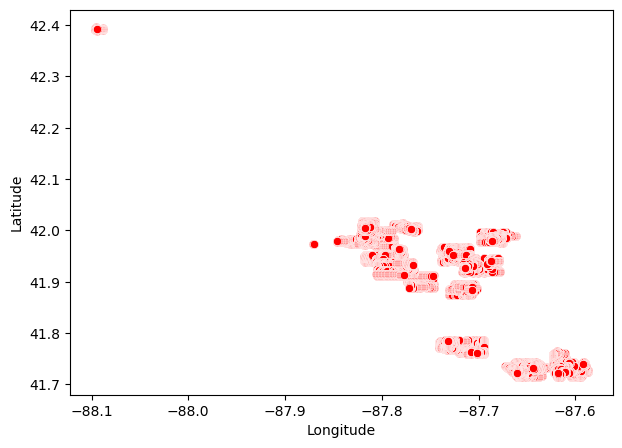

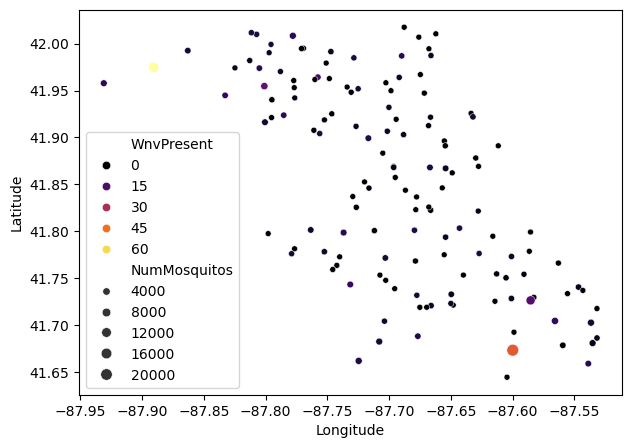

In [15]:
fig, ax = plt.subplots(figsize=(7,5))
# Assuming 'spray' and 'mosquito_areas_wnv' are pandas DataFrame objects
sb.scatterplot(x='Longitude', y='Latitude', data=spray,color='red')
plt.show()
fig, ax = plt.subplots(figsize=(7,5))
sb.scatterplot(x='Longitude', y='Latitude', hue='WnvPresent', size='NumMosquitos', data=mosquito_areas_wnv,palette='inferno')
plt.show()

# Analyzing species

In [16]:
species_vs_virus = train[['Species', 'WnvPresent']].groupby('Species', as_index = False).sum()
species_vs_virus

,Species,WnvPresent
0,CULEX ERRATICUS,0
1,CULEX PIPIENS,240
2,CULEX PIPIENS/RESTUANS,262
3,CULEX RESTUANS,49
4,CULEX SALINARIUS,0
5,CULEX TARSALIS,0
6,CULEX TERRITANS,0


/tmp/ipykernel_33533/1844966436.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sb.barplot(x="Species", y="WnvPresent", data=species_vs_virus,palette='inferno')


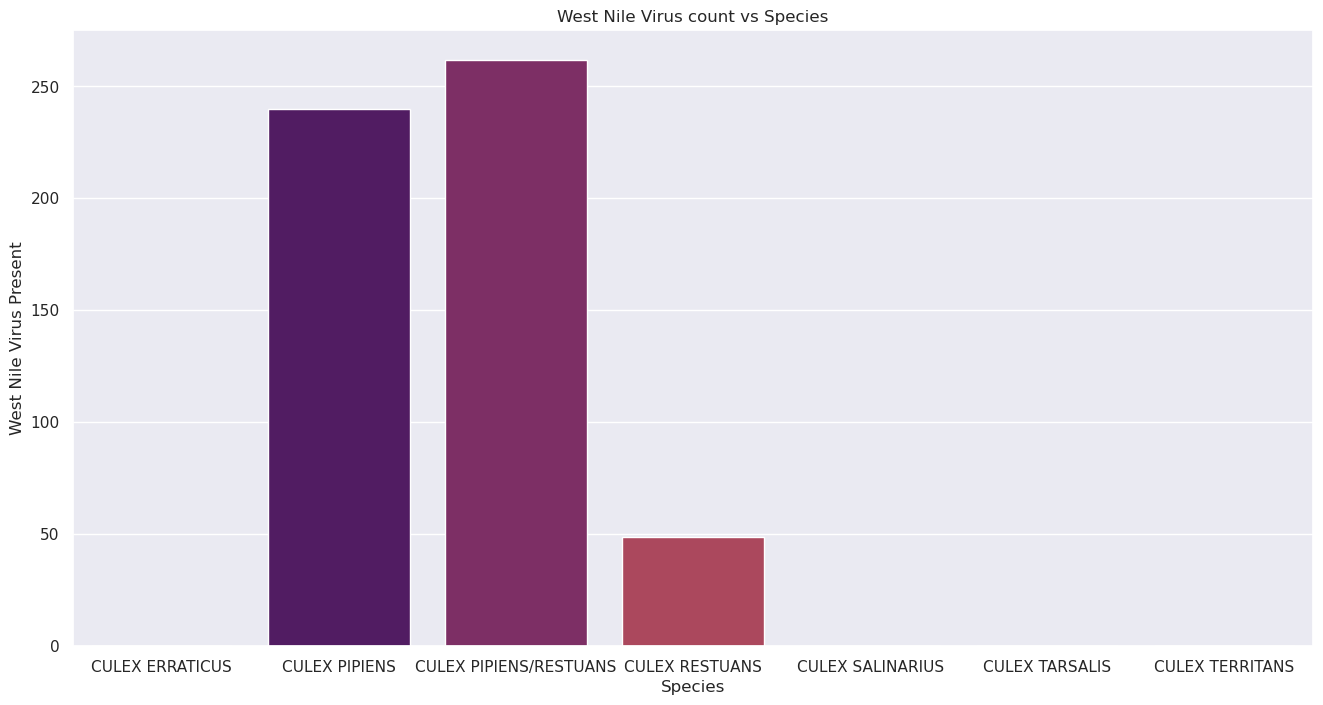

In [17]:
sb.set_theme(style="darkgrid")
plt.figure(figsize=(16, 8))
ax = sb.barplot(x="Species", y="WnvPresent", data=species_vs_virus,palette='inferno')
ax.set_title("West Nile Virus count vs Species")
ax.set_xlabel("Species")
ax.set_ylabel("West Nile Virus Present")
plt.show()

This graph provides a clear comparison of the prevalence of the West Nile Virus among different Culex species.The species “CULEX PIPIENS” and “CULEX PIPIENS/RESTUANS” have significantly higher virus counts compared to the others. 

# Analyzing impact of weather on mosquitos and disease

In [18]:
weather.columns

Index(['Station', 'Date', 'Tmax', 'Tmin', 'Tavg', 'Depart', 'DewPoint',
       'WetBulb', 'Heat', 'Cool', 'Sunrise', 'Sunset', 'CodeSum', 'Depth',
       'Water1', 'SnowFall', 'PrecipTotal', 'StnPressure', 'SeaLevel',
       'ResultSpeed', 'ResultDir', 'AvgSpeed'],
      dtype='object')

In [19]:
weather.value_counts()

Station  Date        Tmax  Tmin  Tavg  Depart  DewPoint  WetBulb  Heat  Cool  Sunrise  Sunset  CodeSum   Depth  Water1  SnowFall  PrecipTotal  StnPressure  SeaLevel  ResultSpeed  ResultDir  AvgSpeed
1        2007-05-01  83    50    67    14      51        56       0      2    0448     1849              0      M       0.0       0.00         29.10        29.82     1.7          27         9.2         1
2        2009-09-04  75    58    67    M       55        60       0      2    -        -       BR HZ     M      M       M         0.00         29.49        30.14     3.8          4          4.4         1
         2009-08-26  72    64    68    M       64        65       0      3    -        -       RA BR     M      M       M         0.54         29.42        30.07     3.9          2          7.3         1
         2009-08-27  67    62    65    M       61        63       0      0    -        -       RA BR     M      M       M         1.19         29.41        30.07     10.7         8         

In [20]:
weather.describe()

,Station,Tmax,Tmin,DewPoint,ResultSpeed,ResultDir
count,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000
mean,1.500000,76.166101,57.810462,53.457880,6.960666,17.494905
std,0.500085,11.461970,10.381939,10.675181,3.587527,10.063609
min,1.000000,41.000000,29.000000,22.000000,0.100000,1.000000
25%,1.000000,69.000000,50.000000,46.000000,4.300000,7.000000
50%,1.500000,78.000000,59.000000,54.000000,6.400000,19.000000
75%,2.000000,85.000000,66.000000,62.000000,9.200000,25.000000
max,2.000000,104.000000,83.000000,75.000000,24.100000,36.000000


In [21]:
weather['Tavg'].unique()

array(['67', '68', '51', '52', '56', '58', 'M', '60', '59', '65', '70',
       '69', '71', '61', '55', '57', '73', '72', '53', '62', '63', '74',
       '75', '78', '76', '77', '66', '80', '64', '81', '82', '79', '85',
       '84', '83', '50', '49', '46', '48', '45', '54', '47', '44', '40',
       '41', '38', '39', '42', '37', '43', '86', '87', '89', '92', '88',
       '91', '93', '94', '90', '36'], dtype=object)

In [22]:
weather[weather['Tavg']=='M']

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
7,2,2007-05-04,78,51,M,M,42,50,M,M,...,,M,M,M,0.00,29.36,30.04,10.1,7,10.4
505,2,2008-07-08,86,46,M,M,68,71,M,M,...,TS RA,M,M,M,0.28,29.16,29.80,7.4,24,8.3
675,2,2008-10-01,62,46,M,M,41,47,M,M,...,,M,M,M,0.00,29.30,29.96,10.9,33,11.0
1637,2,2011-07-22,100,71,M,M,70,74,M,M,...,TS TSRA BR,M,M,M,0.14,29.23,29.86,3.8,10,8.2
2067,2,2012-08-22,84,72,M,M,51,61,M,M,...,,M,M,M,0.00,29.39,M,4.7,19,M
2211,2,2013-05-02,71,42,M,M,39,45,M,M,...,,M,M,M,0.00,29.51,30.17,15.8,2,16.1
2501,2,2013-09-24,91,52,M,M,48,54,M,M,...,,M,M,M,0.00,29.33,30.00,5.8,9,7.7
2511,2,2013-09-29,84,53,M,M,48,54,M,M,...,RA BR,M,M,M,0.22,29.36,30.01,6.3,36,7.8
2525,2,2013-10-06,76,48,M,M,44,50,M,M,...,RA DZ BR,M,M,M,0.06,29.10,29.76,10.1,25,10.6
2579,2,2014-05-02,80,47,M,M,43,47,M,M,...,RA,M,M,M,0.04,29.10,29.79,10.7,23,11.9


In [23]:
weather.drop(weather[weather['Tavg']=='M'].index, axis = 0, inplace = True)
weather.reset_index(drop = True)
weather.columns


Index(['Station', 'Date', 'Tmax', 'Tmin', 'Tavg', 'Depart', 'DewPoint',
       'WetBulb', 'Heat', 'Cool', 'Sunrise', 'Sunset', 'CodeSum', 'Depth',
       'Water1', 'SnowFall', 'PrecipTotal', 'StnPressure', 'SeaLevel',
       'ResultSpeed', 'ResultDir', 'AvgSpeed'],
      dtype='object')

In [24]:
weather['Tavg'] = weather['Tavg'].astype(int) 
weather['Tavg'].unique()

array([67, 68, 51, 52, 56, 58, 60, 59, 65, 70, 69, 71, 61, 55, 57, 73, 72,
       53, 62, 63, 74, 75, 78, 76, 77, 66, 80, 64, 81, 82, 79, 85, 84, 83,
       50, 49, 46, 48, 45, 54, 47, 44, 40, 41, 38, 39, 42, 37, 43, 86, 87,
       89, 92, 88, 91, 93, 94, 90, 36])

In [25]:
weather_imp = weather.groupby(['Date'], as_index = False)[['Tavg']].mean()
weather_imp

,Date,Tavg
0,2007-05-01,67.5
1,2007-05-02,51.5
2,2007-05-03,57.0
3,2007-05-04,58.0
4,2007-05-05,60.0
...,...,...
1467,2014-10-27,65.5
1468,2014-10-28,57.0
1469,2014-10-29,44.0
1470,2014-10-30,43.5


In [26]:
mosquitos_date_wise = train.groupby(['Date'], as_index = False)[['NumMosquitos']].sum()
mosquitos_date_wise

,Date,NumMosquitos
0,2007-05-29,40
1,2007-06-05,127
2,2007-06-26,216
3,2007-06-29,85
4,2007-07-02,240
...,...,...
90,2013-08-29,2645
91,2013-09-06,2510
92,2013-09-12,2210
93,2013-09-19,1030


In [27]:
wnv_date_wise = train.groupby(['Date'], as_index = False)[['WnvPresent']].sum()
wnv_date_wise

,Date,WnvPresent
0,2007-05-29,0
1,2007-06-05,0
2,2007-06-26,0
3,2007-06-29,0
4,2007-07-02,0
...,...,...
90,2013-08-29,38
91,2013-09-06,32
92,2013-09-12,23
93,2013-09-19,11


In [28]:
wnv_mosquitos_dw = pd.merge(mosquitos_date_wise,wnv_date_wise, on = 'Date')
wnv_mosquitos_dw


,Date,NumMosquitos,WnvPresent
0,2007-05-29,40,0
1,2007-06-05,127,0
2,2007-06-26,216,0
3,2007-06-29,85,0
4,2007-07-02,240,0
...,...,...,...
90,2013-08-29,2645,38
91,2013-09-06,2510,32
92,2013-09-12,2210,23
93,2013-09-19,1030,11


In [30]:
weather_df = pd.merge(wnv_mosquitos_dw, weather_imp)
weather_df

,Date,NumMosquitos,WnvPresent,Tavg
0,2007-05-29,40,0,75.5
1,2007-06-05,127,0,56.5
2,2007-06-26,216,0,81.5
3,2007-06-29,85,0,63.5
4,2007-07-02,240,0,67.0
...,...,...,...,...
90,2013-08-29,2645,38,78.0
91,2013-09-06,2510,32,73.0
92,2013-09-12,2210,23,72.5
93,2013-09-19,1030,11,77.0


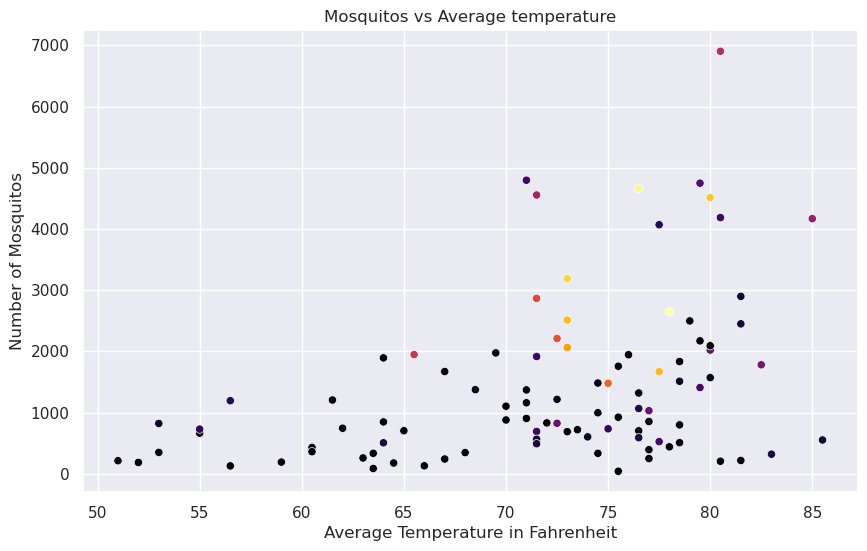

In [31]:
# Create a scatterplot
plt.figure(figsize=(10, 6))
sb.scatterplot(data=weather_df, x="Tavg", y="NumMosquitos",hue='WnvPresent', palette='inferno', legend=False)

# Set the title and labels
plt.title("Mosquitos vs Average temperature")
plt.xlabel("Average Temperature in Fahrenheit")
plt.ylabel("Number of Mosquitos")

# Show the plot
plt.show()

Most of the data points are clustered between 65 and 80 degrees Fahrenheit, indicating a higher number of mosquitoes at these temperatures. This suggests a correlation between the average temperature and the number of mosquitoes. As the average temperature increases from 50 to 80 degrees Fahrenheit, the number of mosquitoes also increases, peaking between 65 and 80 degrees. Beyond 80 degrees, the mosquito count starts to decrease. This suggests that mosquitoes prefer a certain temperature range.

# Conclusion

The code performs a comprehensive analysis of the data, exploring the relationship between the presence of West Nile Virus, the number of mosquitoes, their species, and the locations of the traps. It also considers the impact of weather conditions on these factors. The visualizations provide a clear understanding of the geographical distribution of the traps, the sprayed areas, and the areas with West Nile Virus presence. The code also identifies the imbalance in the dataset with most cases having West Nile Virus absent, which is an important factor to consider during model building. The cleaned and transformed data is now ready for further analysis or model training.